<a href="https://colab.research.google.com/github/xpertdesh/ml-class21/blob/main/projects/bach_chorales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<br><br><br>
# <center>Bach Chorales Project</center>
---
<br>
This project consists of predicting the chords that Bach used based off from a set of notes. Johann Sebastian Bach was a German composer and musician of the Baroque period.<br> 
Fun fact: This is the second time in my life hearing about Bach. First time, was for 326 when Stephen made us read that humungous book GEB.<br><br>
Before looking at the data set. I understand there are 3 columns of actual data, and 2 that wouldn't be used in the project.

### Ok let's get started!


https://raw.githubusercontent.com/zacharski/ml-class/master/data/bach.zip

*   First,  we will download and unzip the file
*   Then, we will import the neccessary libraries in order to take a look at the data
*   Finally, we will explore and analyze the data


In [1]:
! wget https://raw.githubusercontent.com/zacharski/ml-class/master/data/bach.zip

--2021-02-28 02:09:22--  https://raw.githubusercontent.com/zacharski/ml-class/master/data/bach.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41761 (41K) [application/zip]
Saving to: ‘bach.zip’

bach.zip            100%[===================>]  40.78K  --.-KB/s    in 0.006s  

2021-02-28 02:09:22 (6.97 MB/s) - ‘bach.zip’ saved [41761/41761]



In [2]:
! unzip bach.zip -d bach_chorales

Archive:  bach.zip
  inflating: bach_chorales/bach.csv  


##1. Import Neccessary Libraries
<br><br><br>

In [3]:
#data analysis libraries 
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

<br><br><br>

##2. Read in and Explore the Data
It's time to read in the data using `pd.readcsv()`, and take a first look at the data using the `describe()` function.<br><br><br>

In [4]:
bach = pd.read_csv('bach_chorales/bach.csv')
bach.describe(include='all')

,choral_ID,event_number,C,C#,D,D#,E,F,F#,G,G#,A,A#,B,bass,meter,chord_label
count,5665,5665.000000,5665,5665,5665,5665,5665,5665,5665,5665,5665,5665,5665,5665,5665,5665.000000,5665
unique,60,NaN,2,2,2,2,2,2,2,2,2,2,2,2,16,NaN,102
top,002908ch,NaN,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,D,NaN,D_M
freq,207,NaN,3875,4711,3300,4956,3540,4381,4253,3523,5006,3290,4644,3874,689,NaN,503
mean,NaN,53.374404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.134863,NaN
std,NaN,37.268208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.109710,NaN
min,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
25%,NaN,24.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN
50%,NaN,48.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN
75%,NaN,75.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN


<br><br><br>

#3. Data Analysis
We're going to consider the features in the dataset and how complete they are.
<br><br><br>

In [5]:
#get of a list of the features within the dataset
bach.columns

Index(['choral_ID', 'event_number', 'C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G',
       'G#', 'A', 'A#', 'B', 'bass', 'meter', 'chord_label'],
      dtype='object')

In [6]:
#see a sample of the data set to get an idea of the variables
bach.sample(10)

,choral_ID,event_number,C,C#,D,D#,E,F,F#,G,G#,A,A#,B,bass,meter,chord_label
2129,003006b_,112,NO,NO,YES,NO,YES,NO,NO,NO,YES,NO,NO,YES,E,2,E_M
77,000106b_,78,NO,NO,YES,NO,YES,YES,NO,NO,NO,YES,NO,YES,F,2,D_m7
2508,003608b2,17,NO,NO,YES,NO,NO,NO,YES,NO,NO,NO,NO,YES,B,3,B_m
1705,002506b_,77,NO,NO,YES,NO,NO,YES,NO,NO,NO,YES,NO,NO,D,4,D_m
5052,014806bv,6,YES,NO,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,F,4,F_m7
1035,001207b_,81,NO,NO,YES,YES,NO,NO,NO,YES,NO,NO,YES,NO,Bb,2,BbM
1523,001907ch,82,NO,NO,YES,NO,NO,YES,NO,YES,NO,NO,NO,NO,G,2,G_M
520,000606b_,54,NO,NO,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,D,3,D_M
594,000707b_,71,NO,NO,YES,NO,NO,NO,YES,NO,NO,YES,NO,YES,F#,2,G_M
1639,002506b_,11,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,E,5,C_M


<br><br>


* **Numerical Features:** Event Number(Discrete), Meter(Discrete)
* **Categorical Features:** Western Scale(Discrete), Bass(Discrete)
* **Label:** Chord Label(Discrete)

<br>Choral Id, and Event Number will not be used for training.
<br><br>
Let's take another look at the dataset, now that we know what kinds of features we're working with.<br><br><br>


In [7]:
#see a summary of the dataset
bach.describe(include='all')

,choral_ID,event_number,C,C#,D,D#,E,F,F#,G,G#,A,A#,B,bass,meter,chord_label
count,5665,5665.000000,5665,5665,5665,5665,5665,5665,5665,5665,5665,5665,5665,5665,5665,5665.000000,5665
unique,60,NaN,2,2,2,2,2,2,2,2,2,2,2,2,16,NaN,102
top,002908ch,NaN,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,D,NaN,D_M
freq,207,NaN,3875,4711,3300,4956,3540,4381,4253,3523,5006,3290,4644,3874,689,NaN,503
mean,NaN,53.374404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.134863,NaN
std,NaN,37.268208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.109710,NaN
min,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
25%,NaN,24.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN
50%,NaN,48.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN
75%,NaN,75.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN


<br><br><br>

**Some Observatios:** 

* There are a total of 5,665 chords in our dataset.
* All the data is complete, no missing values in the dataset.
* We're going to have to hot-encode the Western Scale, and Bass columns.
* Choral Id and Event Number columns will get dropped since they won't help the fitting process.
<br><br><br>

# 4. Data Visualization

Time to visualize some data.

Bass:
 2    100.0
Name: meter, dtype: float64


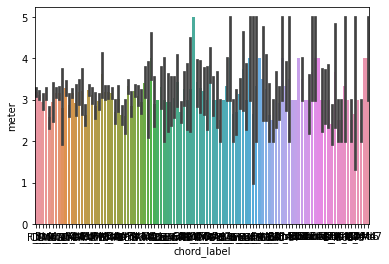

In [8]:
#draw a barplot of meter values
sns.barplot(x="chord_label", y="meter", data=bach)

#print percentages of meters
#print("Meter:\n", bach["meter"].value_counts(normalize = True)*100)
print("Bass:\n", bach["meter"][bach["meter"] == 2].value_counts(normalize = True)*100)

According to the graph, it would seem that the "5" meter is not used a lot when making chords.
<br><br><br>

In [9]:
#draw a barplot of bass values
#sns.barplot(x="chord_label", y="bass", data=bach)

#print percentages of bass
print("Bass:\n", bach["bass"].value_counts(normalize = True)*100)

Bass:
 D     12.162401
A     12.144748
G     12.021183
E     11.968226
C     10.591350
F      8.155340
F#     8.049426
B      7.925861
Bb     5.101500
C#     3.318623
Eb     3.195057
G#     2.594881
D#     1.235658
Ab     0.600177
Db     0.529568
A#     0.406002
Name: bass, dtype: float64


Although, we can't plot the remaining of the columns because they're not numeric, we can still see the percentages for each columns. The most commonly used basses are "D, A, G, E, C, F", which is roughly 60% of the bass column.
<br><br><br>
So, we're not going to plot the 12 notes of a Western Scale because the percentage doesn't show if those notes were actually useful to creating a chord. The percentages are not related to the chord_labels.
<br><br><br>

#5. Cleaning Data

Time to clean our data, hot-encode the bass and notes columns, and delete the unnecessary columns.
<br><br><br>

###Looking at the data
Let's see how our data looks!
<br><br><br>

In [10]:
bach.describe(include="all")

,choral_ID,event_number,C,C#,D,D#,E,F,F#,G,G#,A,A#,B,bass,meter,chord_label
count,5665,5665.000000,5665,5665,5665,5665,5665,5665,5665,5665,5665,5665,5665,5665,5665,5665.000000,5665
unique,60,NaN,2,2,2,2,2,2,2,2,2,2,2,2,16,NaN,102
top,002908ch,NaN,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,D,NaN,D_M
freq,207,NaN,3875,4711,3300,4956,3540,4381,4253,3523,5006,3290,4644,3874,689,NaN,503
mean,NaN,53.374404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.134863,NaN
std,NaN,37.268208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.109710,NaN
min,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
25%,NaN,24.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN
50%,NaN,48.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN
75%,NaN,75.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN


<br><br>
* We need to drop `choral_ID`, and `event_number`.
* We need to hot-encode all the 12 notes.
* We need to hot-encode the `bass` column as well.
<br><br><br>

#### Choral Id and Event Number

In [11]:
# We'll start off by dropping the choral_id and event_number columns,
# since not a lot of useful information can be extracted from it
bach = bach.drop(['choral_ID'], axis=1)
bach = bach.drop(['event_number'], axis=1)

In [12]:
bach.sample(5)

,C,C#,D,D#,E,F,F#,G,G#,A,A#,B,bass,meter,chord_label
431,YES,NO,NO,YES,NO,NO,NO,NO,NO,YES,NO,NO,A,2,F_M
4709,NO,NO,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,D,3,D_M
3315,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,YES,NO,Bb,4,BbM
4945,YES,NO,NO,YES,NO,YES,NO,NO,NO,YES,NO,NO,F,2,F_M
4396,NO,NO,NO,YES,NO,YES,NO,NO,YES,NO,YES,NO,Eb,2,EbM


## One-hot encoding all the data
<br>

* We're going to replace all the wester scale notes to 1's and 0's
* We'll then hot-encode the bass column using `pd.dummies()`
* Repeat last step but for meter column

I chose `pd.dummies()` because I found it easier to split the data as a DataFrame, and not as a Sparse Matrix which I know is more utilized in Machine Learning. I might change it in the future, once I get more acquanited with the Sklearn's One-hot encoder. I do know how to use it, I just need to figure out how to split the data 4-ways.

In [15]:
# have a quick backup just in case
backup_bach = bach

# one-hot encode the notes of a Western Scale
bach = bach.replace( to_replace = {"NO" : 0, "YES" : 1})

# one-hot encode the bass column
ohe = pd.get_dummies(bach['bass'], prefix="bass")
bach = bach.drop('bass', axis=1)
bach = bach.join(ohe)

# one-hot encode the meter column
ohe2 = pd.get_dummies(bach['meter'], prefix="level")
bach = bach.drop('meter', axis=1)
bach = bach.join(ohe2)

<br>

##Split the data
<br>

In [16]:
# split the features and labels columns
bFeatures = bach.drop('chord_label', axis=1)
bLabels = bach['chord_label']

#split the features/labels into a test and train dataframe
from sklearn.model_selection import train_test_split
bach_train_features, bach_test_features, bach_train_labels, bach_test_labels = train_test_split(bFeatures, bLabels, test_size = 0.2, random_state=42)

<br><br><br>
#6. Choosing the best model

I will be testing the following models learned in class:

* kNN Euclidean
* kNN Manhattan
* Decision Tree
* Decision Tree with Cross Validation

For each model, we set the model, fit it with 80% of our training data, predict for 20% of the training data and check the accuracy.
<br><br><br>

In [17]:
# kNN Euclidean
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(bach_train_features, bach_train_labels)
predictions = knn.predict(bach_test_features)

from sklearn.metrics import accuracy_score
accuracy_score(bach_test_labels, predictions)

0.6902030008826125

In [18]:
# Knn Manhattan
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3, p=1)
knn.fit(bach_train_features, bach_train_labels)
predictions = knn.predict(bach_test_features)

from sklearn.metrics import accuracy_score
accuracy_score(bach_test_labels, predictions)

0.6902030008826125

In [19]:
# Decision Tree
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf.fit(bach_train_features, bach_train_labels)
predictions = clf.predict(bach_test_features)

from sklearn.metrics import accuracy_score
accuracy_score(bach_test_labels, predictions)

0.7193292144748455

In [20]:
# Decision Tree with cross validation
from sklearn.model_selection import GridSearchCV
hyperparam_grid = [
    {'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
     'min_samples_split': [2,3,4, 5]}
  ]

from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='entropy')
grid_search = GridSearchCV(clf, hyperparam_grid, cv=10)
grid_search.fit(bach_train_features, bach_train_labels)

from sklearn.metrics import accuracy_score
predictions = grid_search.best_estimator_.predict(bach_test_features)
accuracy_score(bach_test_labels, predictions)

0.7122683142100618

We see that the 2 ways of training the Decision Tree classifier yield almost the same result. However, the kNN classifier are not so far from the Decision Tree classifiers.<br><br>
The Decision Tree classifier yields the best result.